# Background and Context


AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

As a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

   

#Install this package to get US county details
! pip install uszipcode

#  Loading, exploring and pre-processing data

In [2]:
LoanData= pd.read_csv("Loan_Modelling.csv")

In [3]:
#Create a copy of dataset and keep the original dataset in case raw copy required
data= LoanData.copy()

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#Check for missing values
data[data.isnull().any(axis=1)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No missing values in the dataset

Drop ID column as that is index columng and add no value for analysis. 

In [7]:
data.drop(['ID'], axis=1,inplace=True)

In [8]:
#ZipCode is categorical variable but listed as integers. Let us find out county based on zipcode for better understanding
from uszipcode import SearchEngine

search = SearchEngine()
county=[]
for i in np.arange(0, len(data['ZIPCode'])):
    zipcode = search.by_zipcode(data['ZIPCode'][i])
    county.append(zipcode.county)

data['County'] = county

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              4966 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [10]:
data['County'].isnull().sum()

34

We have 34 records without matching counties. 

In [11]:
data['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

Considering majority of  customers are located within certain counties, drop these details to focus on 
other significant variables like income,age,credit card spending and mortgage owned

In [12]:
data.drop(['ZIPCode','County'], axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


All variables are integers except CCAvg which is in float

In [14]:
data.duplicated().sum()

13

In [15]:
data.sort_values("Age", inplace = True)

In [16]:
data[data.duplicated(keep=False)]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
930,28,4,43,3,0.10,2,0,0,0,0,1,0
1026,28,4,43,3,0.10,2,0,0,0,0,1,0
799,29,3,39,4,2.10,3,0,0,0,0,1,0
789,29,3,31,4,0.30,2,0,0,0,0,1,0
590,29,3,39,4,2.10,3,0,0,0,0,1,0
3453,29,3,31,4,0.30,2,0,0,0,0,1,0
4746,31,7,18,1,0.40,3,0,0,0,0,1,0
3227,31,7,18,1,0.40,3,0,0,0,0,1,0
738,36,10,80,4,2.20,2,0,0,0,0,1,0
1526,36,10,80,4,2.20,2,0,0,0,0,1,0


In [17]:
#drop duplicate records
data.drop_duplicates(subset =None,keep ="first", inplace = True)

In [18]:
data.shape

(4987, 12)

In [19]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3157,23,-1,13,4,1.0,1,84,0,0,0,1,0
4285,23,-3,149,2,7.2,1,0,0,0,0,1,0
2618,23,-3,55,3,2.4,2,145,0,0,0,1,0
4411,23,-2,75,2,1.8,2,0,0,0,0,1,1
2430,23,-1,73,4,2.6,1,0,0,0,0,1,0


In [20]:
data.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4360,67,43,41,2,1.1,1,0,0,0,0,0,0
3886,67,43,79,4,1.7,2,215,0,0,1,1,1
2846,67,43,105,4,1.7,2,0,0,0,0,1,0
1859,67,41,20,2,0.4,1,80,0,0,0,0,0
4172,67,42,75,4,0.1,2,182,0,0,0,1,0


In [21]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [22]:
data.duplicated().sum()

0

There are no duplicate values in the dataset anymore

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4987.0,45.347704,11.460838,23.0,35.0,45.0,55.0,67.0
Experience,4987.0,20.114498,11.464902,-3.0,10.0,20.0,30.0,43.0
Income,4987.0,73.824544,46.062728,8.0,39.0,64.0,98.0,224.0
Family,4987.0,2.396631,1.147510,1.0,1.0,2.0,3.0,4.0
CCAvg,4987.0,1.940630,1.748824,0.0,0.7,1.5,2.6,10.0
Education,4987.0,1.879286,0.839667,1.0,1.0,2.0,3.0,3.0
Mortgage,4987.0,56.646080,101.805341,0.0,0.0,0.0,101.0,635.0
Personal_Loan,4987.0,0.096250,0.294964,0.0,0.0,0.0,0.0,1.0
Securities_Account,4987.0,0.104672,0.306161,0.0,0.0,0.0,0.0,1.0
CD_Account,4987.0,0.060557,0.238541,0.0,0.0,0.0,0.0,1.0


Min experience is in negative. An individual with negative or no experience is not likely in real world. Find out any other record with negative experience

In [24]:
np.sum(data['Experience'] <0)

52

There are 51 customer records with negative experience. It does not make sense. Drop these records

In [25]:
data.drop(data[data.Experience < 0].index, inplace=True)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4935.0,45.567173,11.317788,24.0,36.0,46.0,55.0,67.0
Experience,4935.0,20.341641,11.308225,0.0,11.0,20.0,30.0,43.0
Income,4935.0,73.865451,46.142012,8.0,39.0,64.0,98.0,224.0
Family,4935.0,2.391692,1.148293,1.0,1.0,2.0,3.0,4.0
CCAvg,4935.0,1.938640,1.748875,0.0,0.7,1.5,2.6,10.0
Education,4935.0,1.877204,0.839536,1.0,1.0,2.0,3.0,3.0
Mortgage,4935.0,56.783587,101.921386,0.0,0.0,0.0,101.5,635.0
Personal_Loan,4935.0,0.097264,0.296348,0.0,0.0,0.0,0.0,1.0
Securities_Account,4935.0,0.104559,0.306016,0.0,0.0,0.0,0.0,1.0
CD_Account,4935.0,0.061196,0.239713,0.0,0.0,0.0,0.0,1.0


In [27]:
data.shape

(4935, 12)

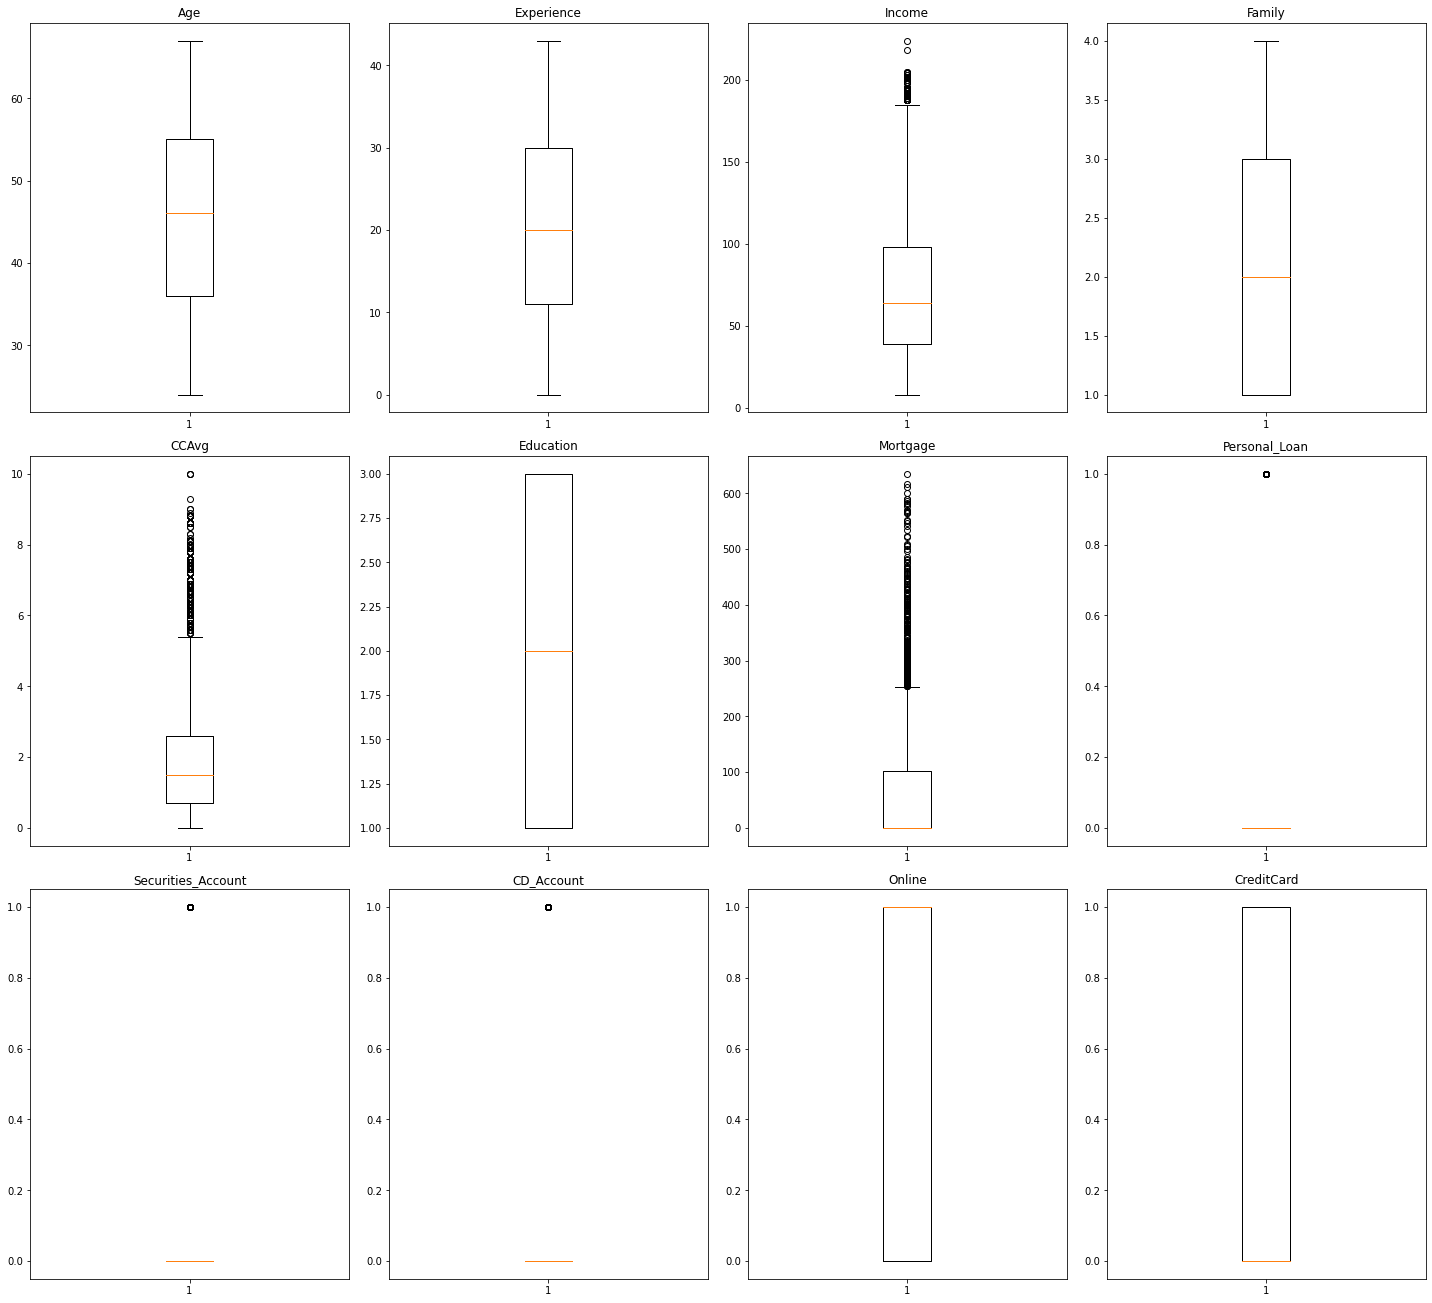

In [28]:
#Identify outliers
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Income, CCAvg and morgage have upper outliers

#  EDA

Univariate Analysis

In [29]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

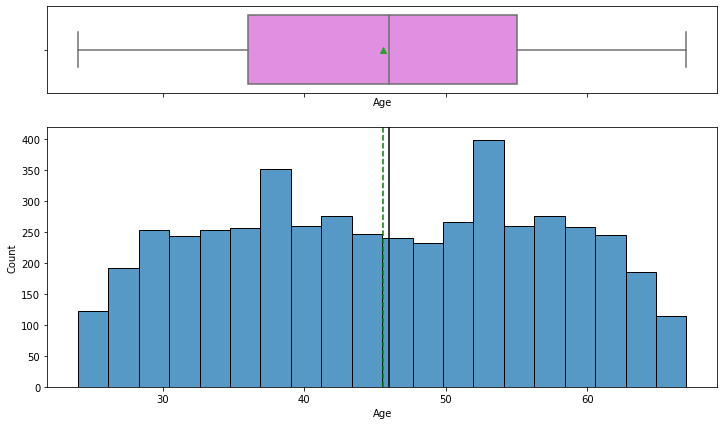

In [30]:
histogram_boxplot(data,"Age")

Age details are close to normally distributed

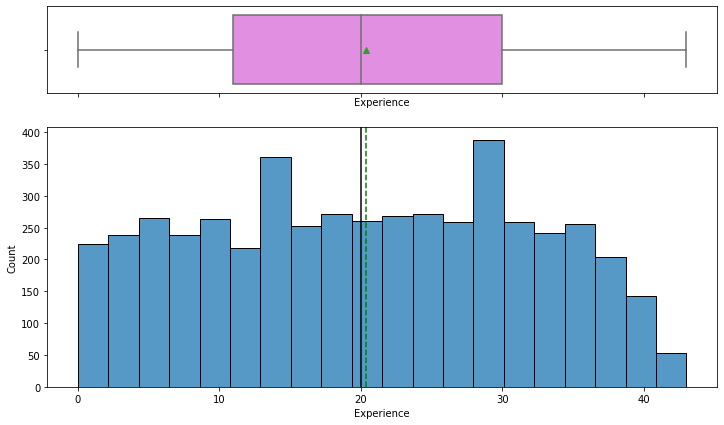

In [31]:
histogram_boxplot(data,"Experience")

Experience data right skewed.

Age and Experience are euqally distributed

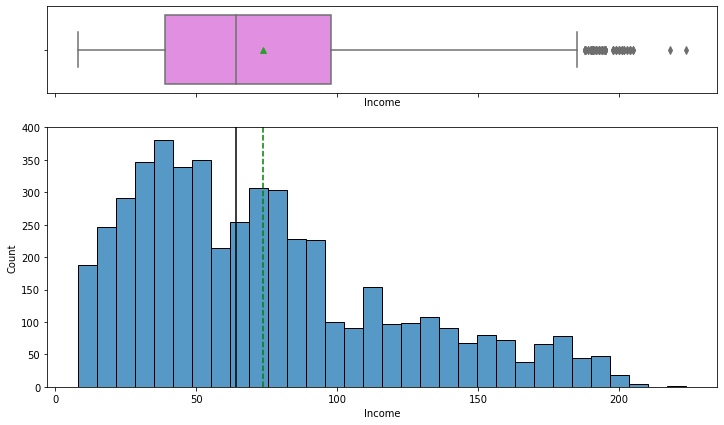

In [32]:
histogram_boxplot(data,"Income")

Income values are right skewed 

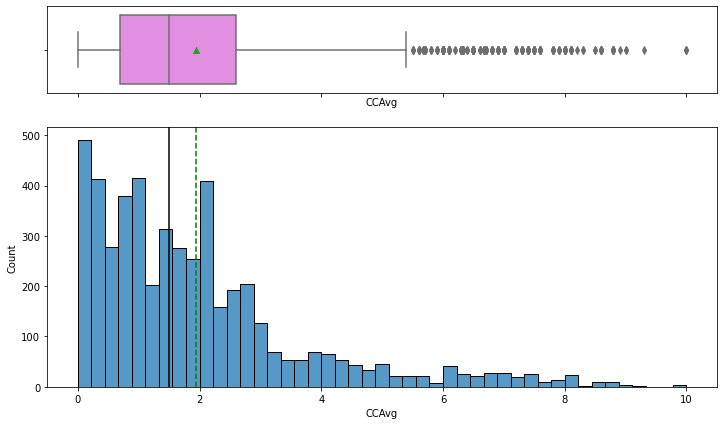

In [33]:
histogram_boxplot(data,"CCAvg")

Credit card average score is right skewed and has outliers

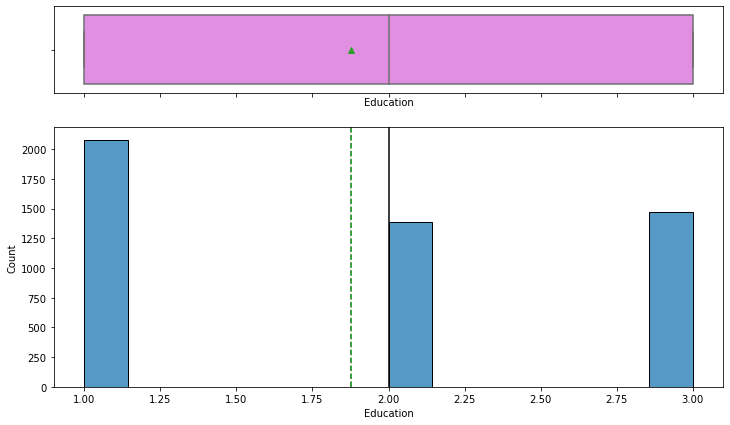

In [34]:
histogram_boxplot(data,"Education")

Education is mostly three level median almost in the middle

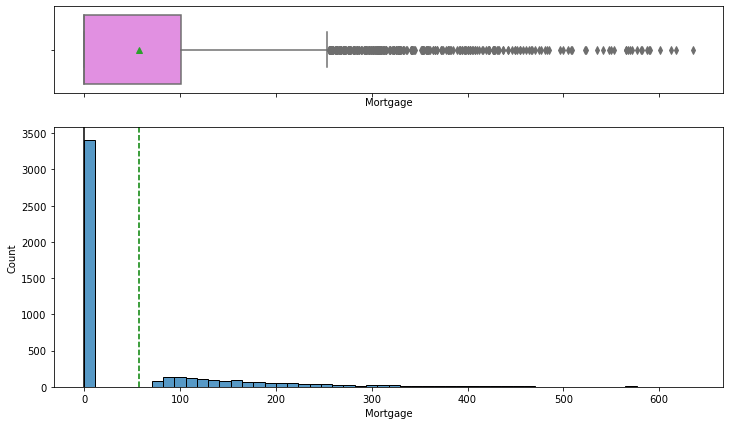

In [35]:
histogram_boxplot(data,"Mortgage")

Mortgage value starts ~80k and after 300k it slows down

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Obeseravations on Family

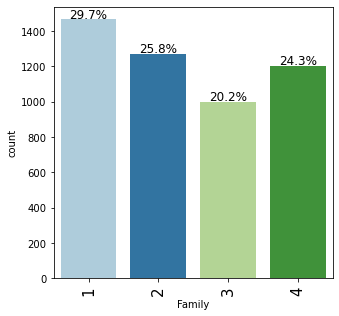

In [37]:
labeled_barplot(data, "Family", perc=True)

Highest percentage of Customers are with family size 1

Obeservation on Education

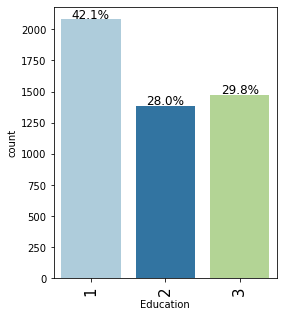

In [38]:
labeled_barplot(data, "Education", perc=True)

Highest percentage of customers are with Undergrade education

Observaions on Creditcard holders

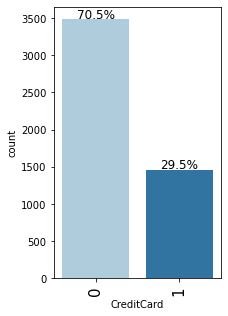

In [39]:
labeled_barplot(data, "CreditCard", perc=True)

Around 30% customers use other banks credit cards

Observations on Personal Loan

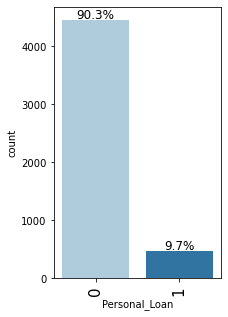

In [40]:
labeled_barplot(data, "Personal_Loan", perc=True)

Only ~10% customers took personal loan during last campaign

Observations on Securities Account

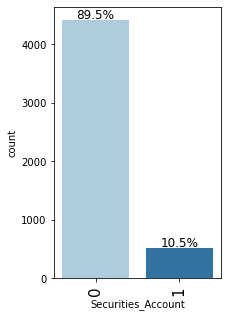

In [41]:
labeled_barplot(data, "Securities_Account", perc=True)

Only around 10% have securities account with the bank

Observations on CD Account

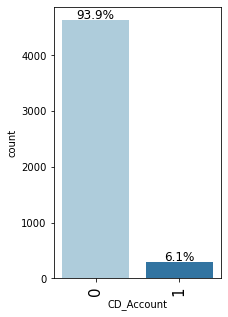

In [42]:
labeled_barplot(data, "CD_Account", perc=True)

CD account is even less. Only 6% have CD account with the bank

Observations about online access

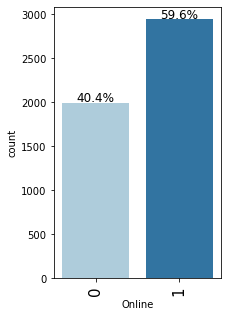

In [43]:
labeled_barplot(data, "Online", perc=True)

Almost 60% have online access

Bivariate analysis

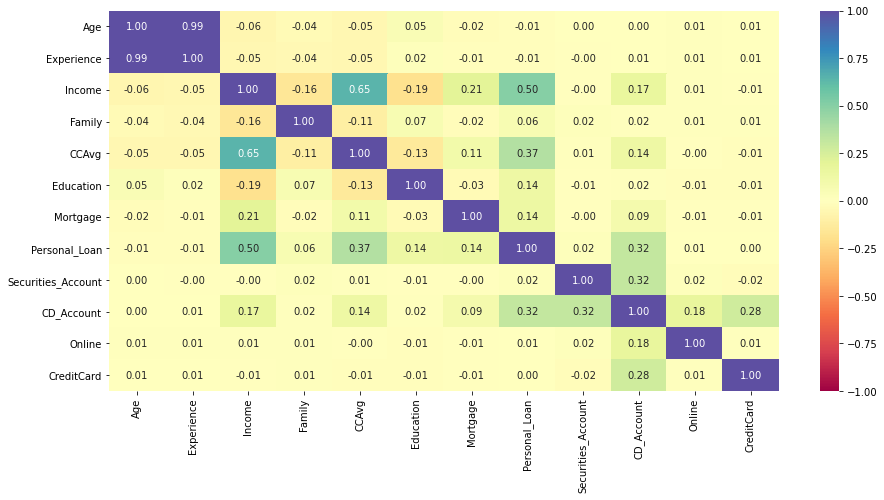

In [44]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Income have postive correlation with Personal Loan and Credit Card average spending
* CD Accounts have positive correlated with Personal Loan, Securities Account and credit card usage
* CD Account holders are also closely correalted with online access

Relationship between feature variables and target variable

In [45]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Family                        
All            4455  480  4935
4              1066  134  1200
3               865  133   998
1              1358  107  1465
2              1166  106  1272
------------------------------------------------------------------------------------------------------------------------


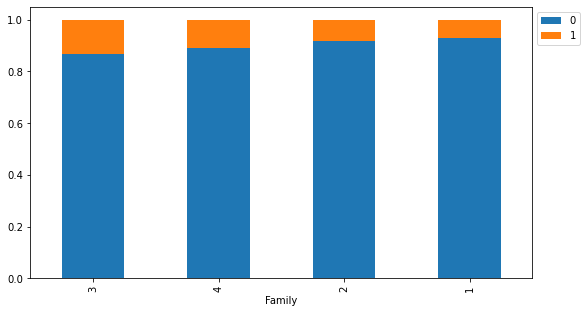

In [46]:
stacked_barplot(data,"Family","Personal_Loan")

Family group 3 has higher percentage of having personal loan with the bank

Personal_Loan     0    1   All
Education                     
All            4455  480  4935
3              1268  205  1473
2              1201  182  1383
1              1986   93  2079
------------------------------------------------------------------------------------------------------------------------


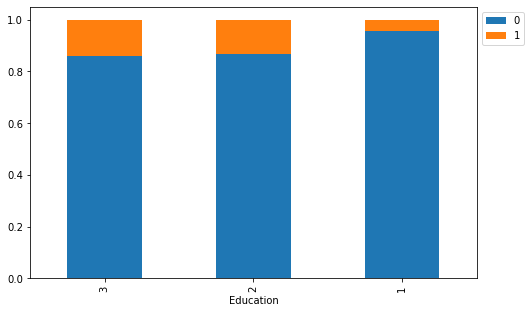

In [47]:
stacked_barplot(data,"Education","Personal_Loan")

Customer with Education level 2 and 3 have higher percentage of personal loans

Personal_Loan     0    1   All
Online                        
All            4455  480  4935
1              2652  291  2943
0              1803  189  1992
------------------------------------------------------------------------------------------------------------------------


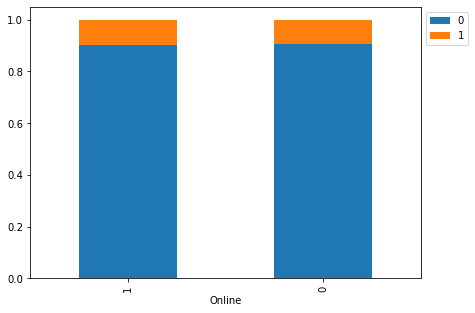

In [48]:
stacked_barplot(data,"Online","Personal_Loan")

Both online and offline customers have similar percentage of personal loans

Personal_Loan          0    1   All
Securities_Account                 
All                 4455  480  4935
0                   3999  420  4419
1                    456   60   516
------------------------------------------------------------------------------------------------------------------------


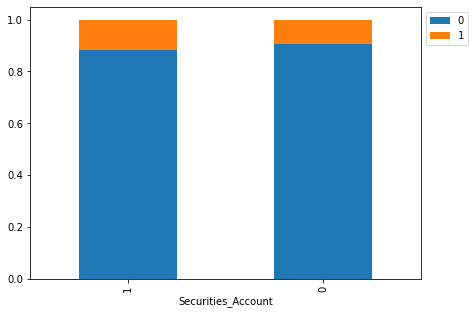

In [49]:
stacked_barplot(data,"Securities_Account","Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4455  480  4935
0              4293  340  4633
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


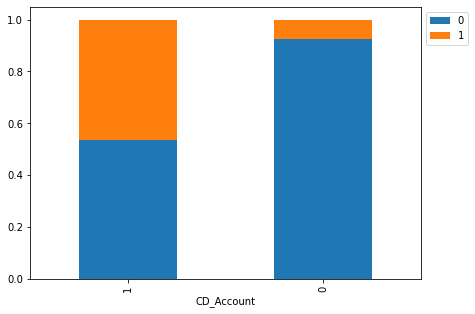

In [50]:
stacked_barplot(data,"CD_Account","Personal_Loan")

Customers with CD account also have high percentage of personal loans

Personal_Loan     0    1   All
CreditCard                    
All            4455  480  4935
0              3144  337  3481
1              1311  143  1454
------------------------------------------------------------------------------------------------------------------------


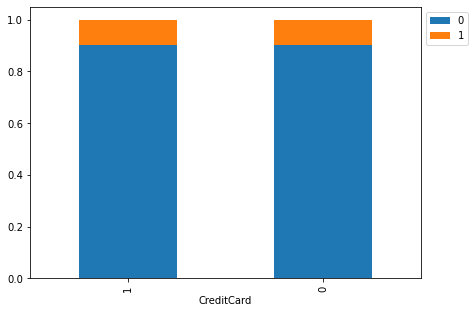

In [51]:
stacked_barplot(data,"CreditCard","Personal_Loan")

Relationship with respect to target variables using histogram and box plot to have better idea about data distribution

In [52]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

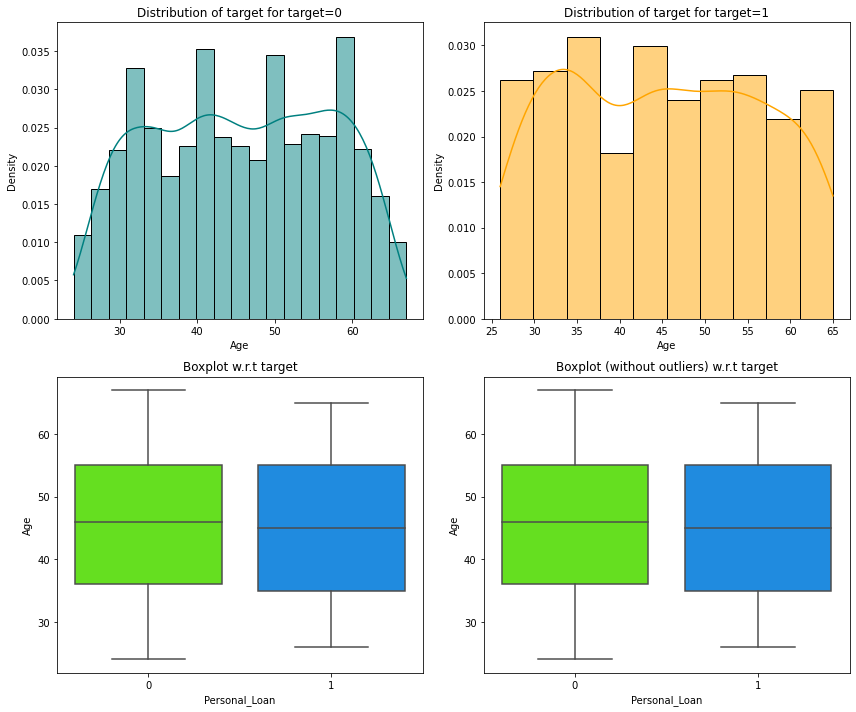

In [53]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

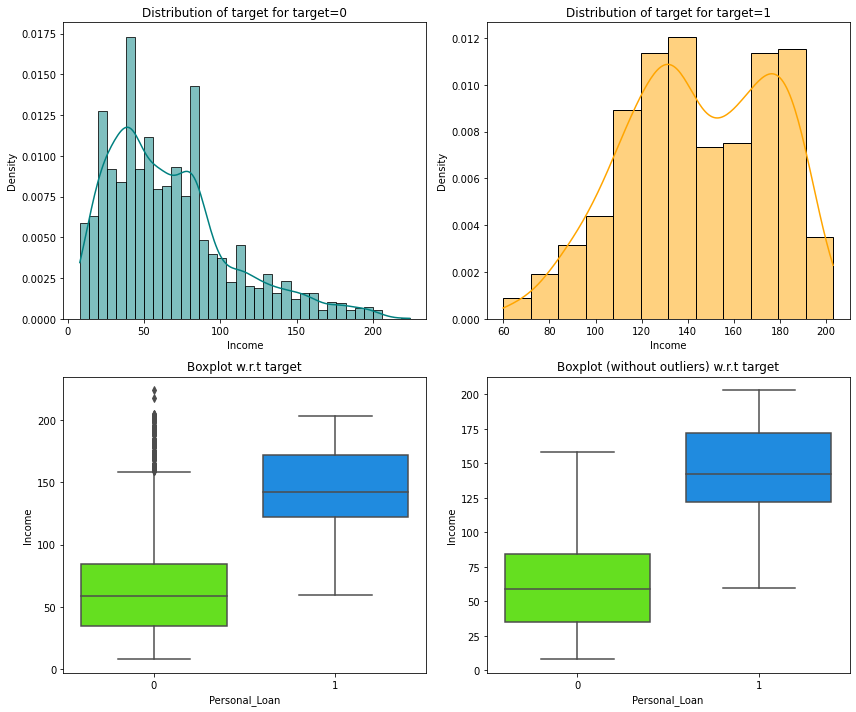

In [54]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

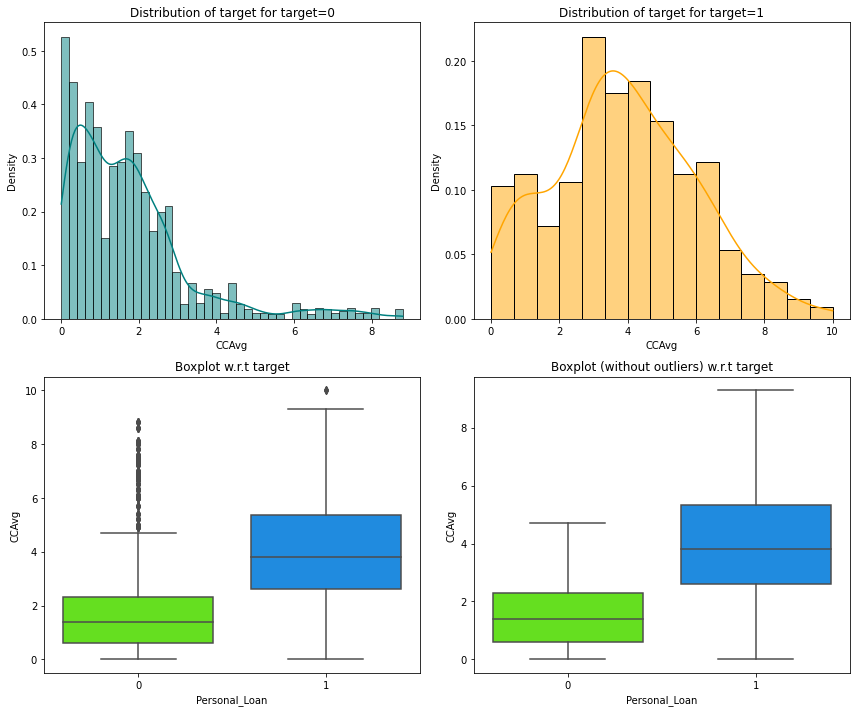

In [55]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

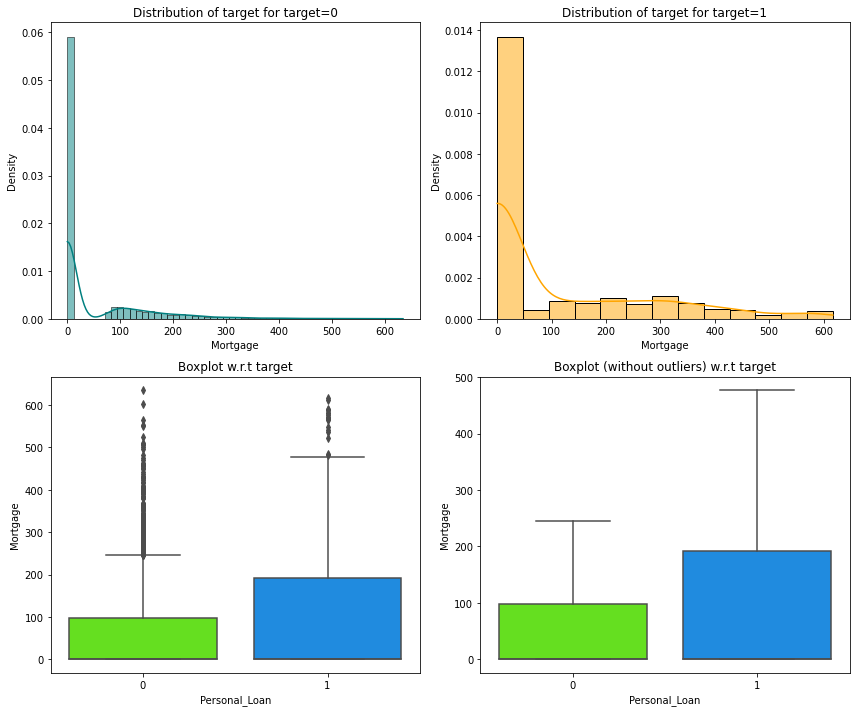

In [56]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

Feature Engineering 

Let us group Age,Income, CCAvg, and Mortgage to simplify model and provide better recommendation to marketing team

In [57]:
fedata= data.copy()

In [58]:
fedata.shape

(4935, 12)

In [59]:
fedata.Age.nunique()

44

In [60]:
fedata['Age'].min()

24

In [61]:
fedata['Age'].max()

67

In [62]:
#Create 5 age groups
def age_combining(x):
    if x<30:
        return "20s"
    elif x>=30 and x<40:
        return "30s"
    elif x>=40 and x<50:
        return "40s"
    elif x>=50 and x<60:
        return "50s"
    elif x>=60 :
        return "60s"
    else:
        return x

In [63]:
fedata["Age_Group"] =fedata["Age"].apply(age_combining)

Relationship between feature variables with Personal Loan 

Personal_Loan     0    1   All
Age_Group                     
All            4455  480  4935
30s            1116  127  1243
50s            1214  118  1332
40s            1138  117  1255
60s             603   69   672
20s             384   49   433
------------------------------------------------------------------------------------------------------------------------


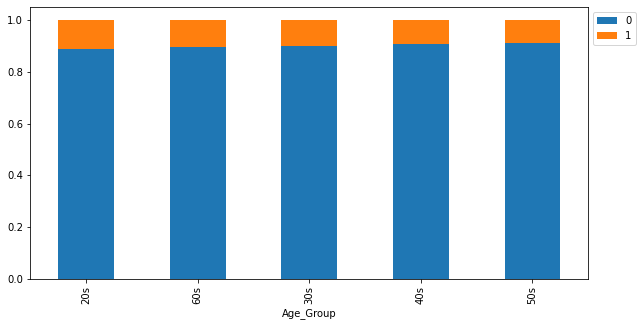

In [64]:
stacked_barplot(fedata, "Age_Group", "Personal_Loan")

~10% have personal loan in all age groups

In [65]:
data.Income.nunique()

162

In [66]:
fedata['Income'].min()

8

In [67]:
fedata['Income'].max()

224

In [68]:
def income_combining(x):
    if x<100:
        return "<100k"
    elif x>=100 and x<200:
        return "100-200k"
    elif x>=200:
        return "200k+"
    else:
        return x

In [69]:
fedata["Income_Group"] =fedata["Income"].apply(income_combining)

Personal_Loan     0    1   All
Income_Group                  
All            4455  480  4935
100-200k        753  436  1189
<100k          3686   41  3727
200k+            16    3    19
------------------------------------------------------------------------------------------------------------------------


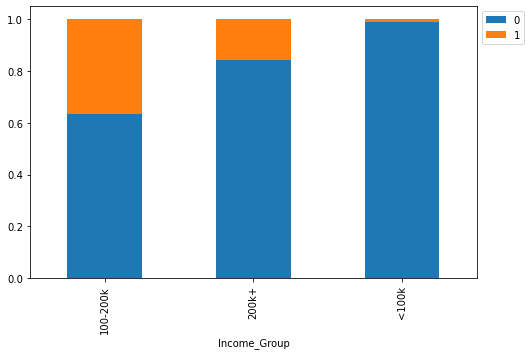

In [70]:
stacked_barplot(fedata, "Income_Group", "Personal_Loan")

Customer with less than 100k income do not have much personal loan. At the same time 436 customers with income between 100k to 200k have more personal loan

In [71]:
fedata["CCAvg"].nunique()

108

Group Avg Credit Card usage

In [72]:
fedata['CCAvg'].min()

0.0

In [73]:
fedata['CCAvg'].max()

10.0

In [74]:
def ccavg_combining(x):
    if x<3:
        return "<3k"
    elif x>=3 and x<6:
        return "3-6k"
    elif x>=6.0 and x<9.0:
        return "6-9k"
    elif x>=9.0:
        return "9k+"
    else:
        return x

In [75]:
fedata["CCAvg_Group"] =fedata["CCAvg"].apply(ccavg_combining)

In [76]:
fedata["CCAvg_Group"].nunique()

4

Personal_Loan     0    1   All
CCAvg_Group                   
All            4455  480  4935
3-6k            387  248   635
<3k            3890  148  4038
6-9k            178   78   256
9k+               0    6     6
------------------------------------------------------------------------------------------------------------------------


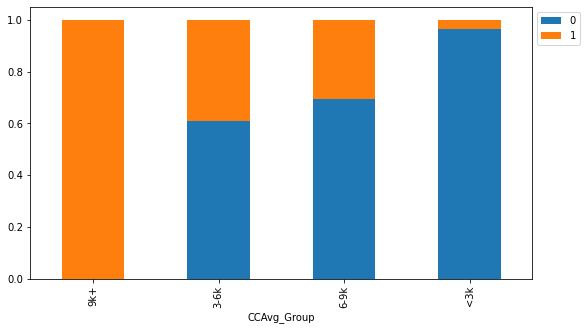

In [77]:
stacked_barplot(fedata, "CCAvg_Group", "Personal_Loan")

Customer with credit card spending between 3k to 6k have more personal loan with the bank. 

Group Mortgage value as well

In [78]:
fedata['Mortgage'].max()

635

In [79]:
def mortgage_combining(x):
    if x<100:
        return "<100k"
    elif x>=100 and x<250:
        return "100-250k"
    elif x>=250 and x<500:
        return "250-500k"
    elif x>=500:
        return "500k+"
    else:
        return x

In [80]:
fedata["Mortgage_Group"] =fedata["Mortgage"].apply(mortgage_combining)

Personal_Loan      0    1   All
Mortgage_Group                 
All             4455  480  4935
<100k           3350  325  3675
250-500k         193   79   272
100-250k         902   60   962
500k+             10   16    26
------------------------------------------------------------------------------------------------------------------------


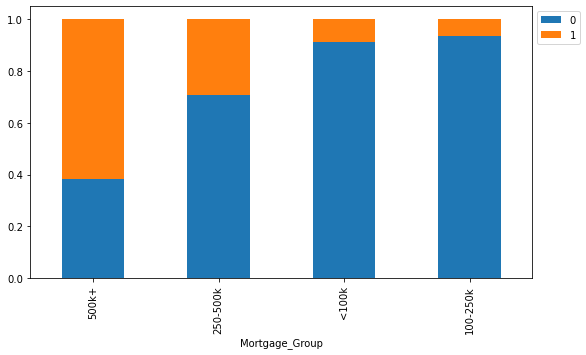

In [81]:
stacked_barplot(fedata, "Mortgage_Group", "Personal_Loan")

All groups have personal loan with less than 100k mortgage group have higher number

Mortgage_Group  100-250k  250-500k  500k+  <100k   All
Age_Group                                             
All                  962       272     26   3675  4935
30s                  258        61     10    914  1243
40s                  225        75      6    949  1255
50s                  260        74      6    992  1332
20s                   84        30      2    317   433
60s                  135        32      2    503   672
------------------------------------------------------------------------------------------------------------------------


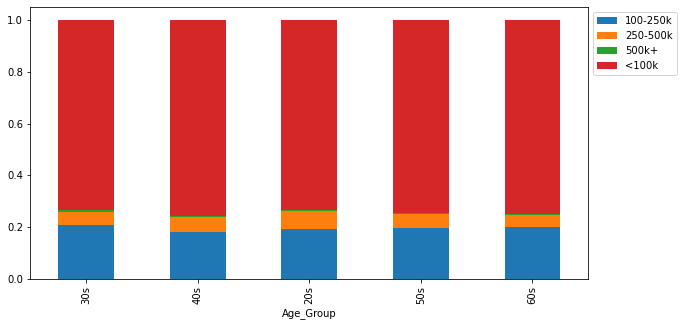

In [82]:
stacked_barplot(fedata, "Age_Group", "Mortgage_Group")

Mortgage_Group  100-250k  250-500k  500k+  <100k   All
Income_Group                                          
All                  962       272     26   3675  4935
100-200k             135       174     24    856  1189
200k+                  2         2      2     13    19
<100k                825        96      0   2806  3727
------------------------------------------------------------------------------------------------------------------------


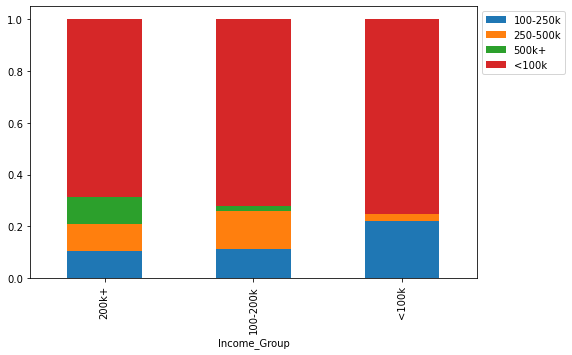

In [83]:
stacked_barplot(fedata, "Income_Group", "Mortgage_Group")

CCAvg_Group   3-6k  6-9k  9k+   <3k   All
Income_Group                             
All            635   256    6  4038  4935
100-200k       414   244    3   528  1189
200k+            3    11    3     2    19
<100k          218     1    0  3508  3727
------------------------------------------------------------------------------------------------------------------------


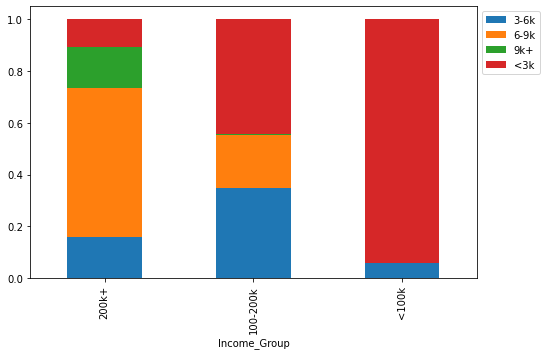

In [84]:
stacked_barplot(fedata, "Income_Group", "CCAvg_Group")

CCAvg_Group  3-6k  6-9k  9k+   <3k   All
Family                                  
All           635   256    6  4038  4935
1             231    72    3  1159  1465
2             189   137    1   945  1272
3              92    26    1   879   998
4             123    21    1  1055  1200
------------------------------------------------------------------------------------------------------------------------


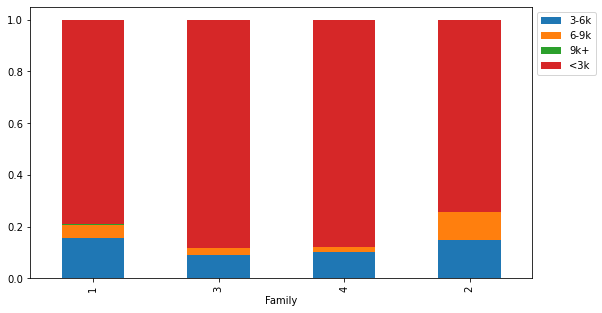

In [85]:
stacked_barplot(fedata, "Family", "CCAvg_Group")

In [86]:
fedata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_Group,Income_Group,CCAvg_Group,Mortgage_Group
155,24,0,60,4,1.6,1,0,0,0,0,1,0,20s,<100k,<3k,<100k
2259,24,0,82,3,0.8,1,0,0,0,0,1,0,20s,<100k,<3k,<100k
3908,24,0,44,3,0.1,2,0,0,0,0,0,0,20s,<100k,<3k,<100k
4393,24,0,59,4,1.6,1,0,0,0,0,0,0,20s,<100k,<3k,<100k
182,24,0,135,1,1.5,1,0,0,0,0,1,0,20s,100-200k,<3k,<100k


In [87]:
#As we grouped Age,Income, Mortgage and Credit Card average spending, drop the original columns
fedata.drop(['Age','Income','CCAvg','Mortgage'], axis=1,inplace=True)

In [88]:
fedata.columns

Index(['Experience', 'Family', 'Education', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Age_Group',
       'Income_Group', 'CCAvg_Group', 'Mortgage_Group'],
      dtype='object')

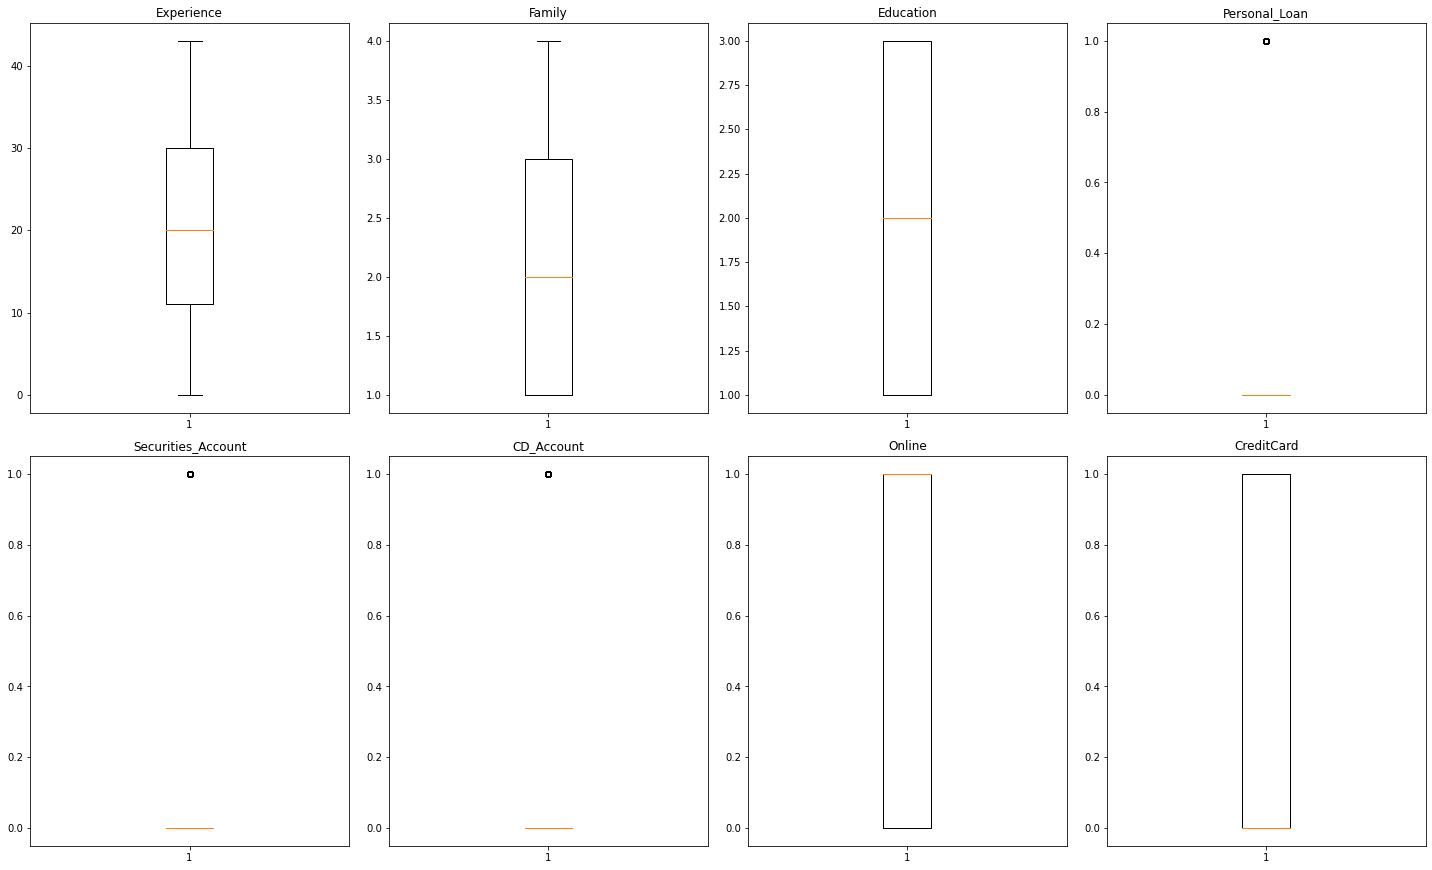

In [89]:
#Identify outliers
numerical_col = fedata.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(fedata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Few Observations from EDA

* Only ~10% cutomers have personal loan with the bank
* Key feature variables like Age,Income, CCAvg, AND Mortgage are right skewed
* ~60% have online access
* Highest customer base is in Los Angeles County and lowest in Napa County

#  Data Preparation

At this point make a copy of dataset to use one copy for logistic Regression and another for DecisionTree Modeling

Using feature engineered data for logistic regression 

In [90]:
lrdata = fedata.copy()

For decision tree modeling using dataset without feature engineering to see better influence of data points

In [91]:
dtdata = data.copy()

Split the data for trian and test sets

In [92]:
X = lrdata.drop(["Personal_Loan"], axis=1)
Y = lrdata["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, Y, test_size=0.30, random_state=1#, stratify=Y
                                                )

In [93]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3454, 19)
Shape of test set :  (1481, 19)
Percentage of classes in training set:
0    0.899537
1    0.100463
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.910196
1    0.089804
Name: Personal_Loan, dtype: float64


Model evaluation criterion

Model can make wrong predictions as:

Predicting a customer will take personal loan contribute to the revenue but in reality the customer may not take personal loan. - Loss of resources

Predicting a customer will not take personal loan and not contribute to revenue but in reality the customer would take personal loan. - Loss of opportunity


Which case is more important?

If we predict a customer who was going to take personal loan as a customer who will not purchase personal loan.
How to reduce this loss i.e need to reduce False Negatives?

Recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.


# Building Logistic Regression Model

In [94]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [95]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
#     print(model.predict_proba(predictors))
#     print('=========')
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [96]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [97]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Experience,Family,Education,Securities_Account,CD_Account,Online,CreditCard,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Income_Group_200k+,Income_Group_<100k,CCAvg_Group_6-9k,CCAvg_Group_9k+,CCAvg_Group_<3k,Mortgage_Group_250-500k,Mortgage_Group_500k+,Mortgage_Group_<100k,Intercept
Coefficients,-0.002233,0.730921,1.674918,-0.864966,3.298936,-0.640331,-1.032334,0.088627,0.329599,0.949547,0.244903,-0.585972,-5.017416,-1.071681,0.919205,-2.243331,0.55981,0.777629,0.048043,-3.871019


Coefficient interpretations

Coefficient of Experience,Securities Account,online access,credit card use and income upto 100k,credit card spending less than two 2k are in negative. Increase in these will lead to decrease in chance of taking personal loan

All other Coefficients are positive.Increase in these will lead to increase in chances of a person taking personal loan.

In [98]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Experience,Family,Education,Securities_Account,CD_Account,Online,CreditCard,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Income_Group_200k+,Income_Group_<100k,CCAvg_Group_6-9k,CCAvg_Group_9k+,CCAvg_Group_<3k,Mortgage_Group_250-500k,Mortgage_Group_500k+,Mortgage_Group_<100k
Odds,0.997769,2.076992,5.338357,0.421066,27.083804,0.527118,0.356175,1.092673,1.390410,2.584538,1.277497,0.556564,0.006622,0.342433,2.507297,0.106104,1.750340,2.176306,1.049216
Change_odd%,-0.223077,107.699204,433.835740,-57.893415,2608.380431,-47.288227,-64.382529,9.267350,39.041041,158.453796,27.749728,-44.343560,-99.337839,-65.756743,150.729663,-89.389555,75.034021,117.630575,4.921589


* Experience: Holding all other features constant a 1 unit change in Experience will decrease the odds of a person taking personal loan by 0.99 times or a 2.2% decrease in odds of taking personal loan

* CreditCard: Holding all other features constant a 1 unit change in the online access will decrease the odds of a person taking personal loan by 0.52 times or a 47% decrease in odds of taking personal loan

We can do similar interpretation for other attributes.

# Checking model performance on training set

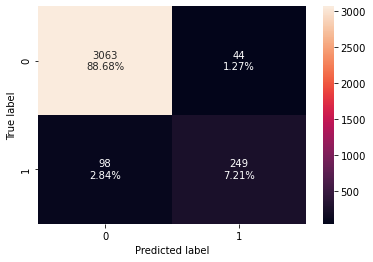

In [99]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [100]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.958888,0.717579,0.849829,0.778125


# Checking model performance on testing set

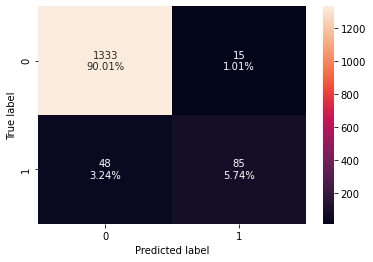

In [101]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [102]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.957461,0.639098,0.85,0.729614


# ROC-AUC

* ROC-AUC on training set

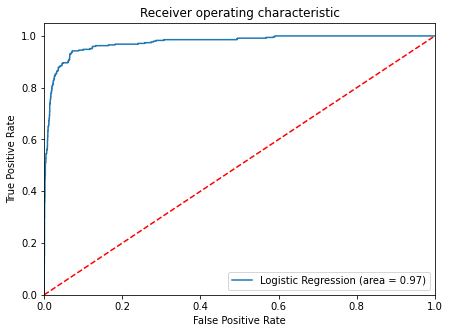

In [103]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

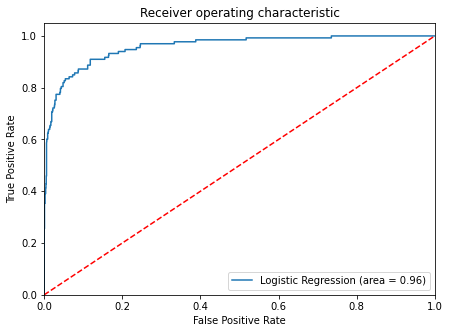

In [104]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model Performance Improvement

Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [105]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.12361404934226332


# Checking model performance on training set

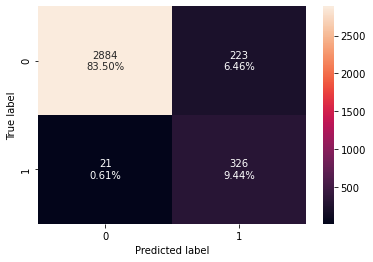

In [106]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [107]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.929357,0.939481,0.593807,0.727679


# Checking model performance on test set

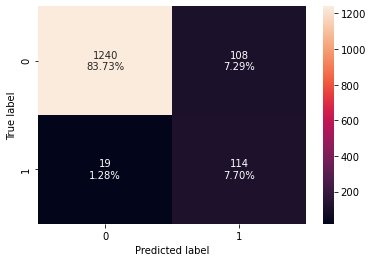

In [108]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [109]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.914247,0.857143,0.513514,0.642254


Let's use Precision-Recall curve and see if we can find a better threshold

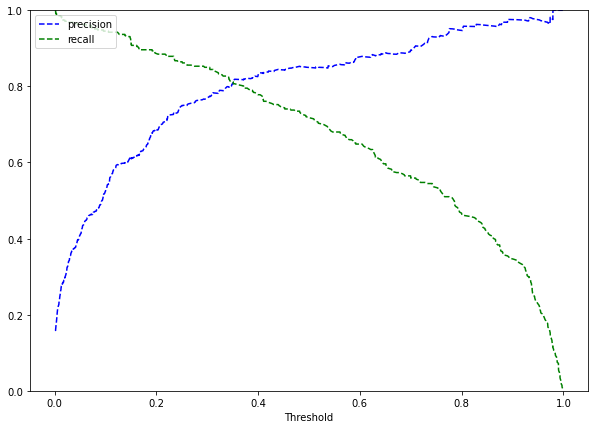

In [110]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [111]:
# setting the threshold
optimal_threshold_curve = 0.36

Checking model performance on training set

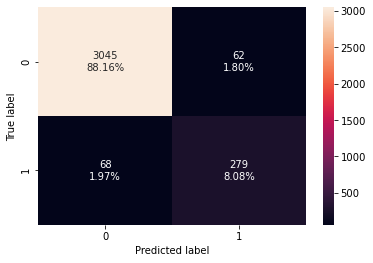

In [112]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [117]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.962362,0.804035,0.818182,0.811047


Checking model performance on test set

In [118]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.954085,0.706767,0.764228,0.734375


In [121]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
    "Logistic Regression-0.36 Threshold"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.12 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.958888,0.929357,0.962362
Recall,0.717579,0.939481,0.804035
Precision,0.849829,0.593807,0.818182
F1,0.778125,0.727679,0.811047


In [122]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
    "Logistic Regression-0.36 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.12 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.957461,0.914247,0.954085
Recall,0.639098,0.857143,0.706767
Precision,0.850000,0.513514,0.764228
F1,0.729614,0.642254,0.734375


Conclusion

Lowering threshold maximize the recall score but optimized threshold will balance the risk vs reward of personal loans.

Based on above model with 0.36 as threshold we will be able to minimize loss of opportunities and improving prediction of potential personal loan takers

# Build Decision Tree Model

We could use non feature engineered data to see high level feature influence. 
But using feature engineered data will help marketing target specific group 
within individual feature for more effective rsults

In [123]:
X = dtdata.drop(["Personal_Loan"], axis=1)
Y = dtdata["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, Y, test_size=0.30, random_state=1#, stratify=Y
                                                )

In [124]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3454, 11)
Shape of test set :  (1481, 11)
Percentage of classes in training set:
0    0.899537
1    0.100463
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.910196
1    0.089804
Name: Personal_Loan, dtype: float64


In [125]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [126]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

Based on what we see as current personal loan rate earlier, we can pass a dictionary {0:0.10,1:0.90} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

In [127]:
# Percentage of classes in training set:
# 0    0.905429
# 1    0.094571

model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.10, 1: 0.90}, random_state=1
)

In [128]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

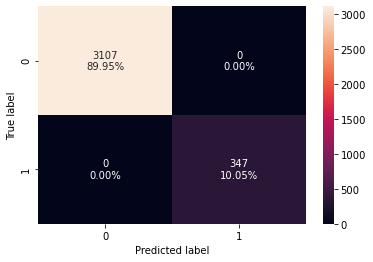

In [129]:
confusion_matrix_sklearn(model, X_train, y_train)

In [130]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


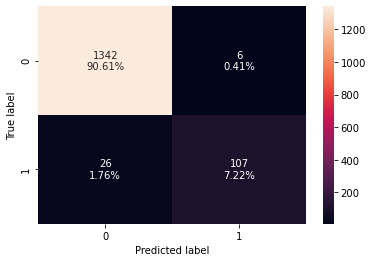

In [131]:
confusion_matrix_sklearn(model, X_test, y_test)

In [132]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8045112781954887


In [135]:
## creating a list of column names
feature_names = X_train.columns.to_list()

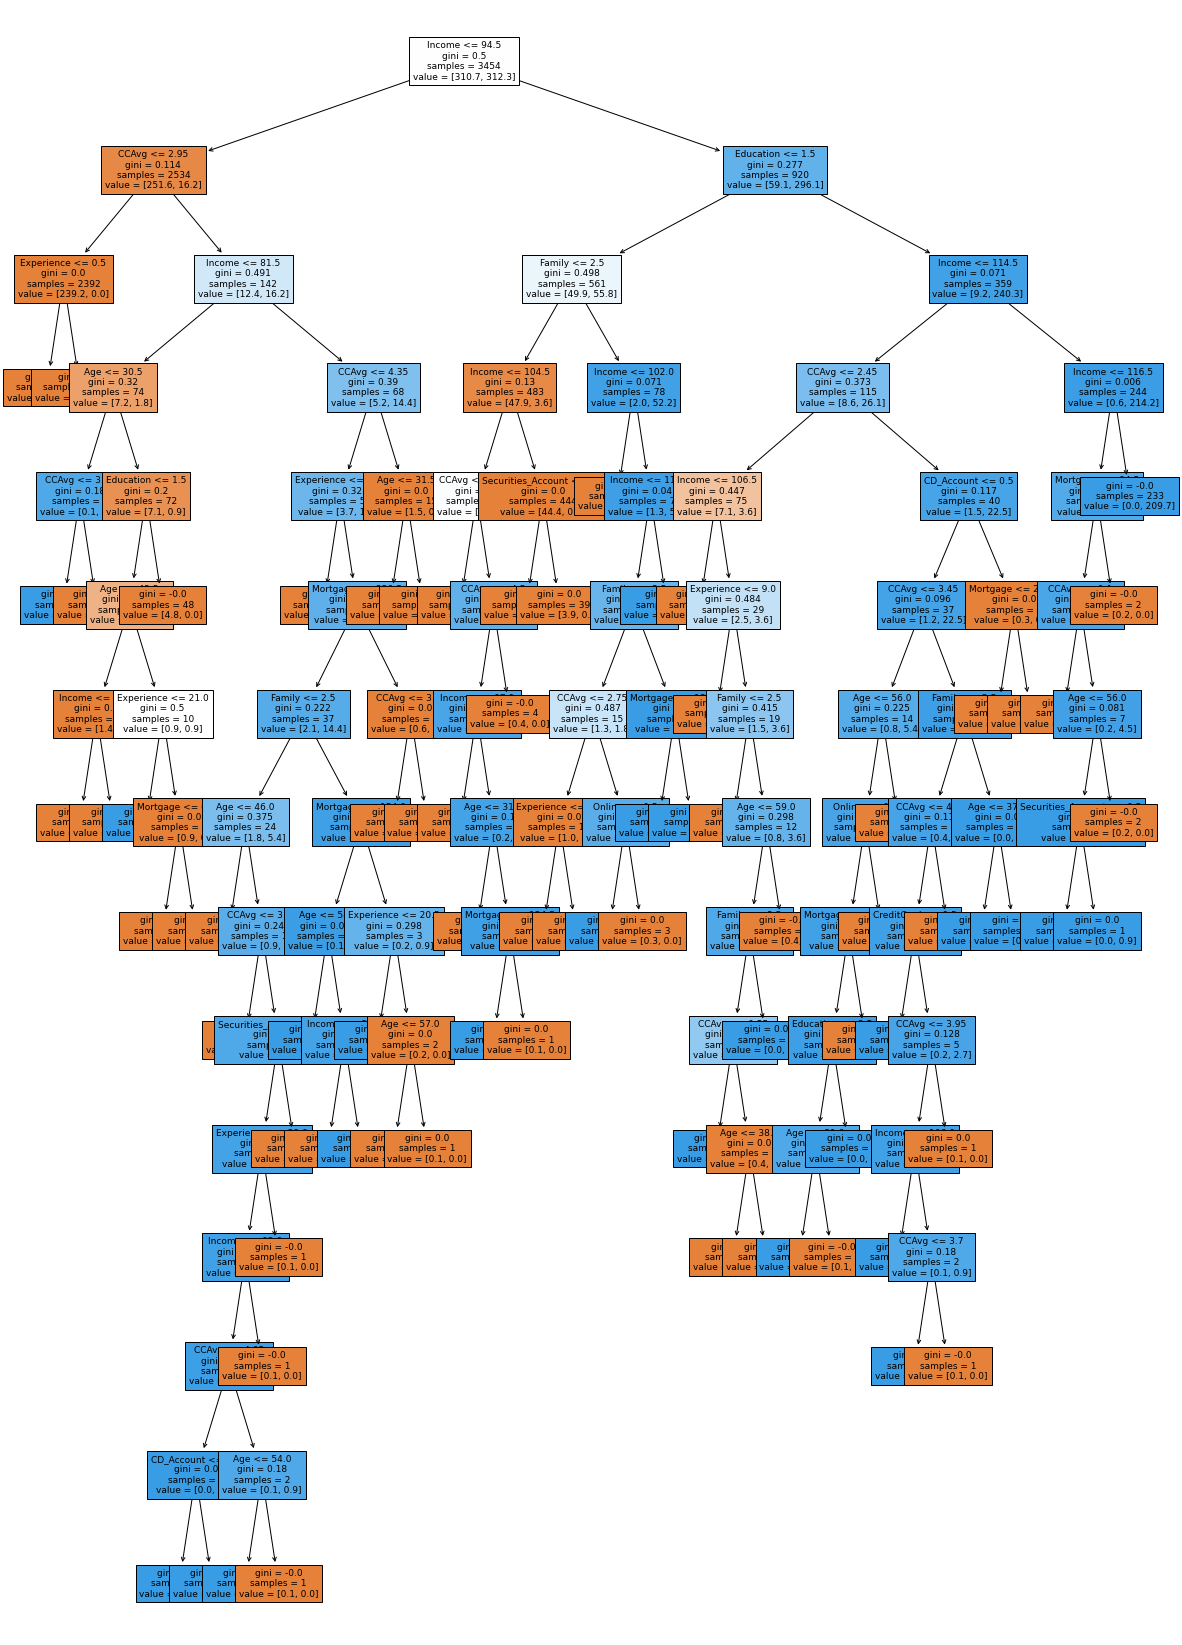

In [136]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [137]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- Experience <= 0.50
|   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |--- Experience >  0.50
|   |   |   |--- weights: [236.20, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 30.50
|   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |--- Age >  30.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |--- Income <= 59.00
|   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  59.00
|   |   |   |   |   |   |   |--- weights: [1.30, 0.00] class: 0
|   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |--- Experience <= 21.00
|   |   |   |   |   |   |   |--- weights: [0.00, 0.90] class: 1
|   |   |   |   |   |   |--- Experience >  21.00
|   |

In [138]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.632667
Family              0.141610
CCAvg               0.095911
Education           0.091322
Age                 0.015495
Experience          0.011503
Mortgage            0.005284
Online              0.002804
CD_Account          0.001714
Securities_Account  0.001642
CreditCard          0.000049


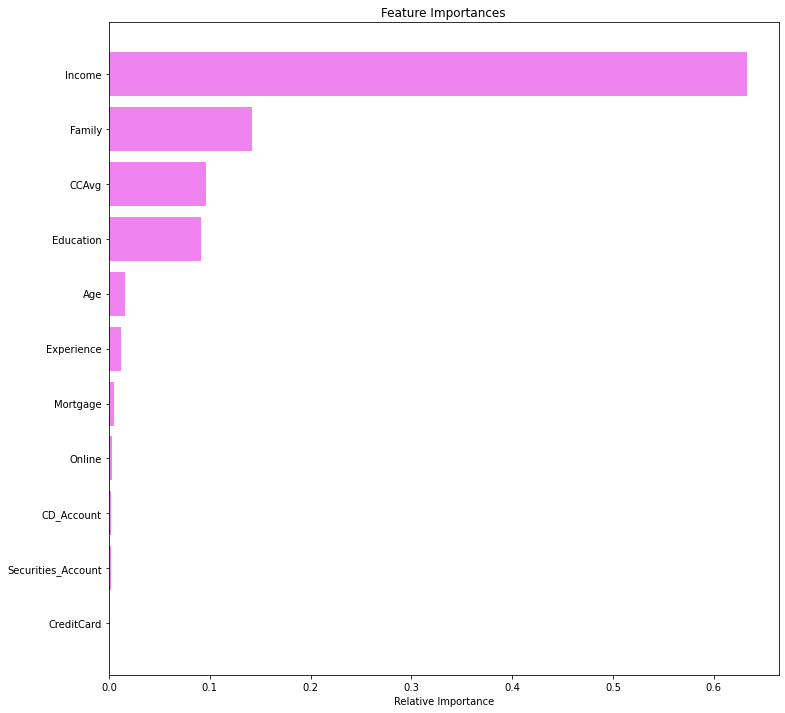

In [139]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [140]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})

# Grid of parameters to choose from
parameters = {
                "max_depth": [5, 10, 15, None], #8, 10,12 #7,8,9
                "criterion": ["entropy", "gini"],
                "splitter": ["best", "random"],
                "min_impurity_decrease": [0.00001, 0.0001, 0.01, 0.1],  #0-1
            }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

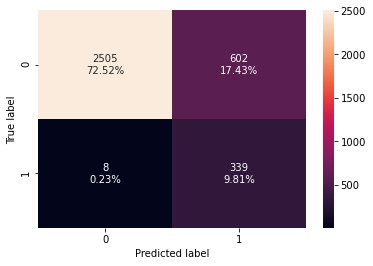

In [141]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [142]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9769452449567724


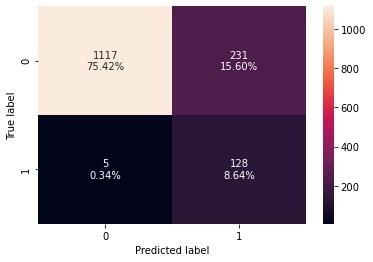

In [143]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [144]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9624060150375939


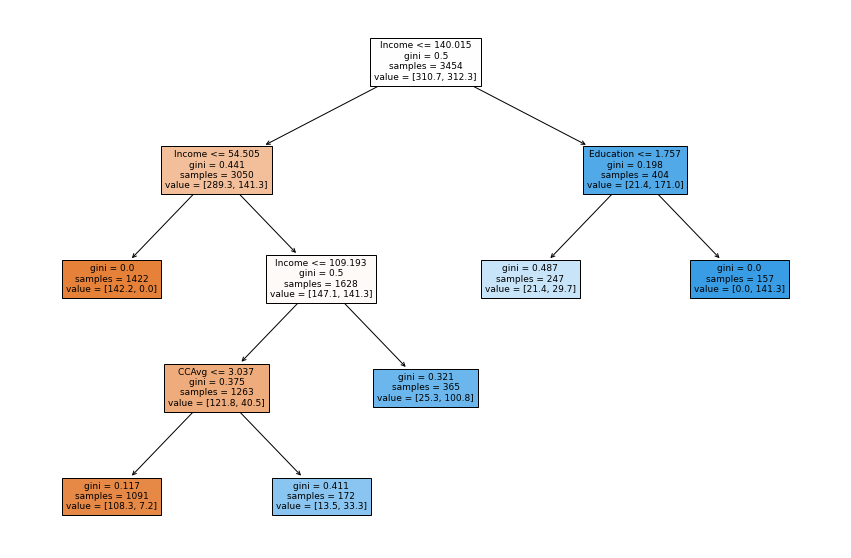

In [145]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [146]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 140.01
|   |--- Income <= 54.50
|   |   |--- weights: [142.20, 0.00] class: 0
|   |--- Income >  54.50
|   |   |--- Income <= 109.19
|   |   |   |--- CCAvg <= 3.04
|   |   |   |   |--- weights: [108.30, 7.20] class: 0
|   |   |   |--- CCAvg >  3.04
|   |   |   |   |--- weights: [13.50, 33.30] class: 1
|   |   |--- Income >  109.19
|   |   |   |--- weights: [25.30, 100.80] class: 1
|--- Income >  140.01
|   |--- Education <= 1.76
|   |   |--- weights: [21.40, 29.70] class: 1
|   |--- Education >  1.76
|   |   |--- weights: [0.00, 141.30] class: 1



In [147]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.806816
CCAvg               0.131517
Education           0.061668
Age                 0.000000
Experience          0.000000
Family              0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


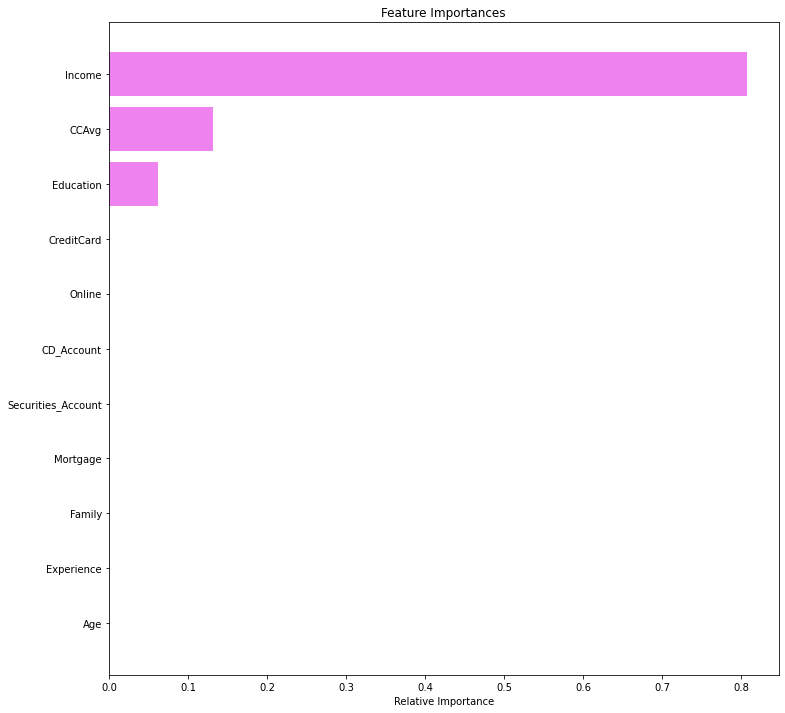

In [148]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [149]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [150]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.420658e-16
1,1.782059e-19,-1.418876e-16
2,6.415414e-19,-1.412460e-16
3,1.283083e-18,-1.399629e-16
4,1.496930e-18,-1.384660e-16
5,1.782059e-18,-1.366840e-16
6,2.405780e-18,-1.342782e-16
7,2.405780e-18,-1.318724e-16
8,2.566166e-18,-1.293062e-16
9,5.773873e-18,-1.235324e-16


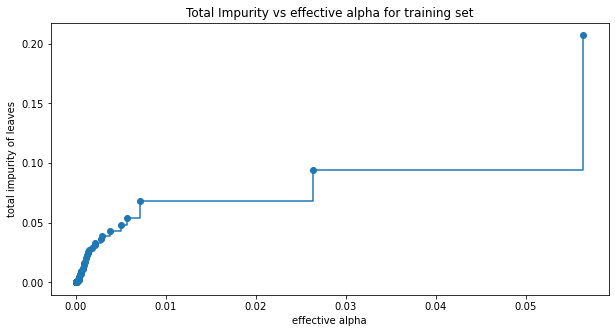

In [151]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [152]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.10, 1: 0.90}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29297694787361295


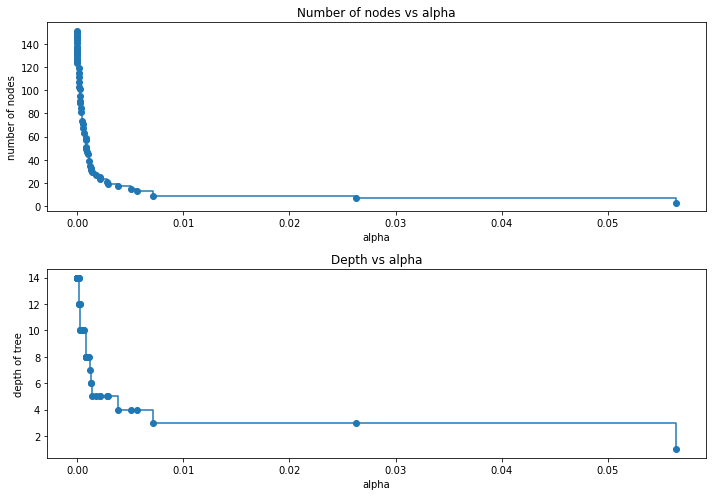

In [153]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [154]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [155]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [156]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

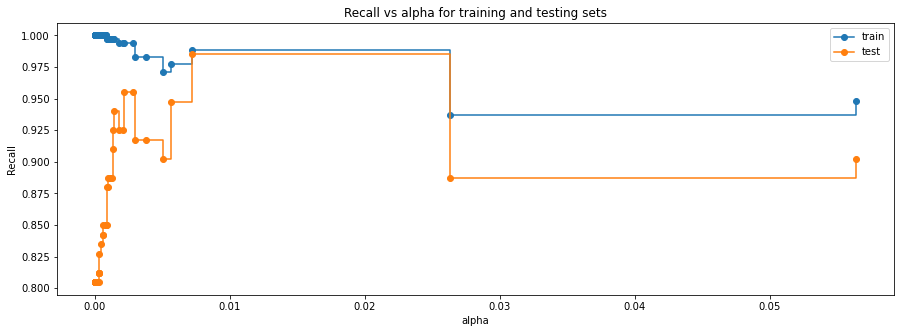

In [157]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [159]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.007170790455810899,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [160]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007170790455810899,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

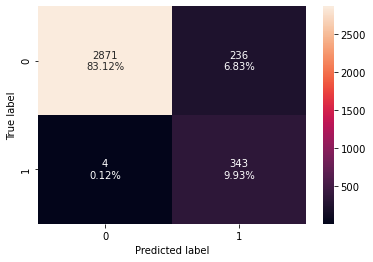

In [161]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [162]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9884726224783862


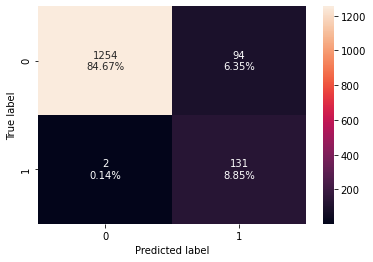

In [163]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [164]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9849624060150376


In [ ]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [165]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.025, class_weight={0: 0.10, 1: 0.90}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.025, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

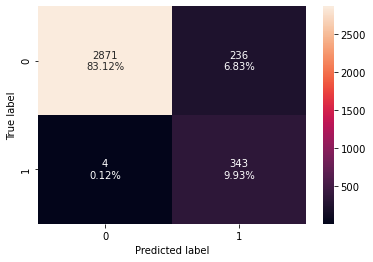

In [166]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [167]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9884726224783862


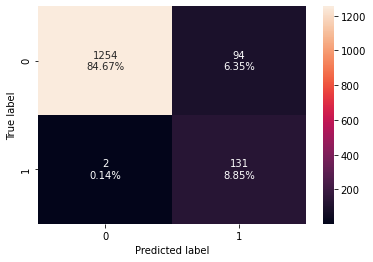

In [168]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [169]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9849624060150376


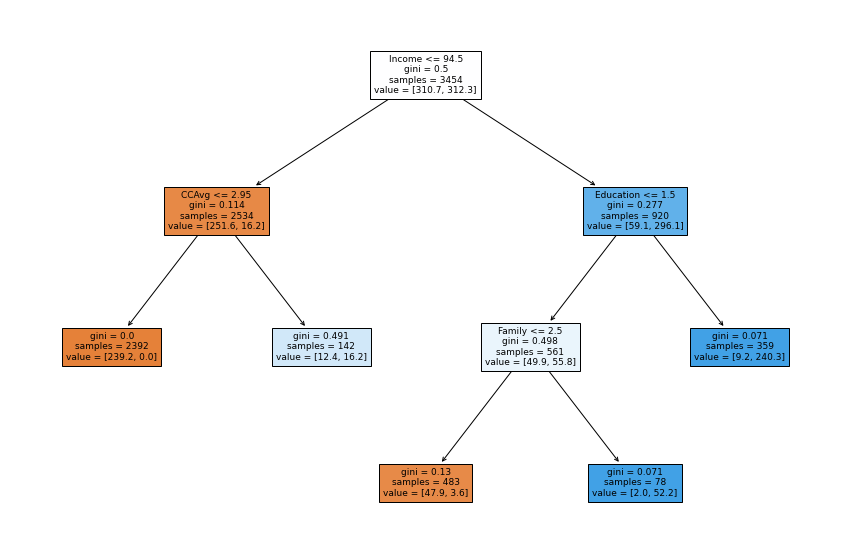

In [170]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [171]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [239.20, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [12.40, 16.20] class: 1
|--- Income >  94.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [47.90, 3.60] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.00, 52.20] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [9.20, 240.30] class: 1



In [172]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.678077
Family              0.156536
Education           0.104489
CCAvg               0.060898
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


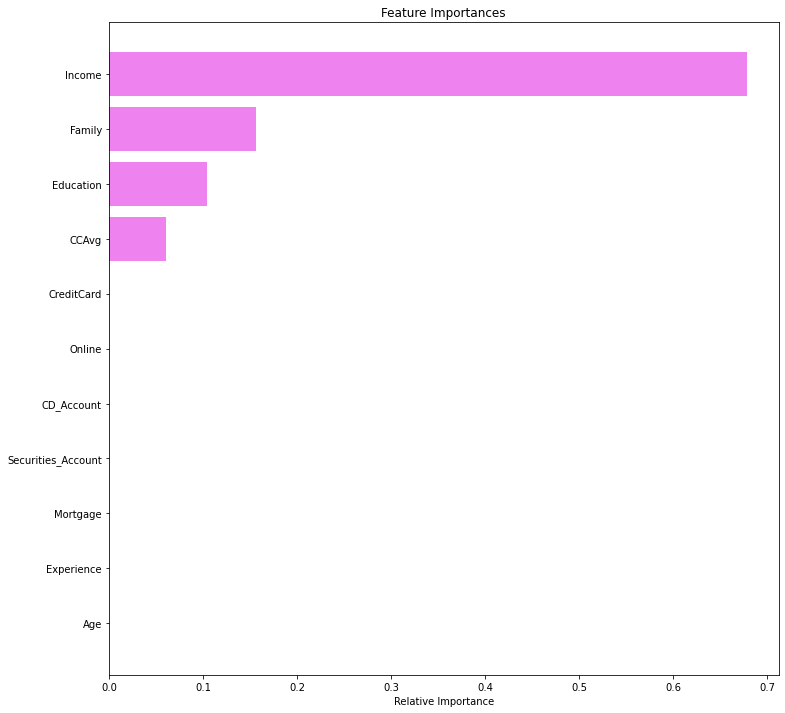

In [173]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [174]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.976945
2,0.988473


In [175]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.804511
1,0.962406
2,0.984962


Looking at recall performance on test sets, having ccp_alpha as 0.025 brings much better results 

Conclusion

* Analyzed dataset using diffrent approach and used Decision Tree Classifier to build the model. This model helps bank to predict 
whether a customer potentially purchase personal loan or not

* Visualized diffrent trees and related confusion matrix for better understanding of the model

* Based on the model Income, Family, Education and CCAvg are the most improtant variables for prediction

* Also established the importance of hyper parameters,pruning to reduce overfitting

# Recommendation

* For better risk/reward optimization, based on logistic regression model, cut-off should 0.36. This is expected to bring better revenue to the bank

* According to decision tree model
    1) Customers with income more than 95k may not take personal loan
    2) Customer with income more than 95k and with credit card spending around 3k then there is a very high chance that the customer is going to take personal loan    
    3) With higher income level higher family size and education more chance of taking personal loan
    
* There are around 60% customer use online access which is huge opportunity to target directly for personal loans

* ~30% use other bank credit cards. Offering personal loan with competitive rates may influence these customers to take personal laon

* More than 70% customer falls below 100k income level and around 1000 customers falls between 2-5k credit card spending level. 
Targeting this group will likely increase the personal loan aquisation